# Linear Regression

In [43]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Read the data
df = pd.read_csv('data/Ames_Housing_Data.tsv', sep='\t')

# Get only the numeric columns for simplicity purpose
df = df._get_numeric_data()

# remove outliers that are within +3 to -3 standard deviations and apply to all columns
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

# Check for null values
sum(df.isna().sum())

0

In [45]:
df.head(2)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000


In [46]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1631.000000,1.631000e+03,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,...,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.0,1631.000000,1631.000000,1631.000000,1631.000000
mean,1469.259963,7.083505e+08,54.681177,66.882281,8976.129368,6.177192,5.536481,1975.053955,1986.157572,88.225628,...,86.359902,43.966278,15.925812,0.014102,7.378296,0.0,11.394237,6.137339,2007.774985,177301.484979
std,853.926643,1.884906e+08,40.457766,20.360454,3492.057974,1.351162,0.976277,30.018269,21.245779,137.955957,...,105.719747,54.384019,44.531618,0.569509,31.511314,0.0,94.193592,2.692324,1.327024,67899.903322
min,2.000000,5.263021e+08,20.000000,21.000000,1300.000000,2.000000,3.000000,1885.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,35000.000000
25%,738.500000,5.284291e+08,20.000000,56.000000,7200.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2007.000000,129125.000000
50%,1473.000000,5.354501e+08,50.000000,67.000000,9000.000000,6.000000,5.000000,1978.000000,1996.000000,0.000000,...,0.000000,30.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,161000.000000
75%,2192.500000,9.071806e+08,60.000000,80.000000,10800.000000,7.000000,6.000000,2004.000000,2005.000000,159.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,212000.000000
max,2930.000000,9.241510e+08,180.000000,136.000000,33120.000000,10.000000,8.000000,2010.000000,2010.000000,630.000000,...,468.000000,247.000000,214.000000,23.000000,182.000000,0.0,1500.000000,12.000000,2010.000000,418000.000000


### Visual Analysis

Let's use **pairplots** to check for linear relationship with Sales Price 

I will divide the pairplots to make it easier to visualize and analyze the plots

In [47]:
list_var = [x for x in df.columns if x != 'SalePrice']

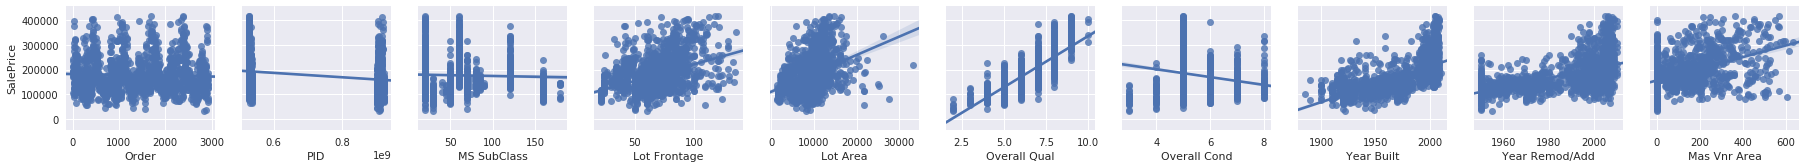

In [48]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[:10], kind="reg")

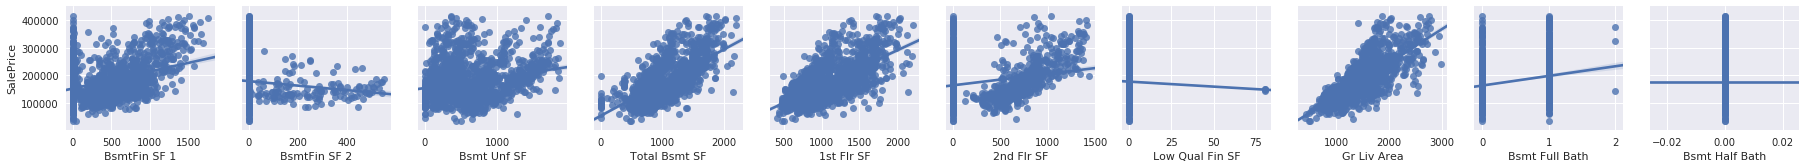

In [49]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[10:20], kind="reg")

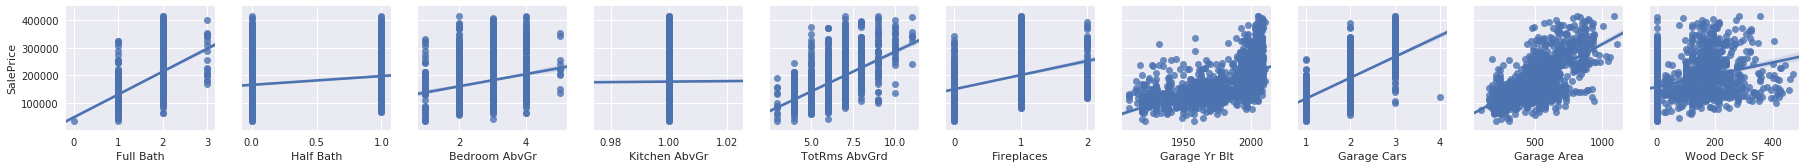

In [50]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[20:30], kind="reg")

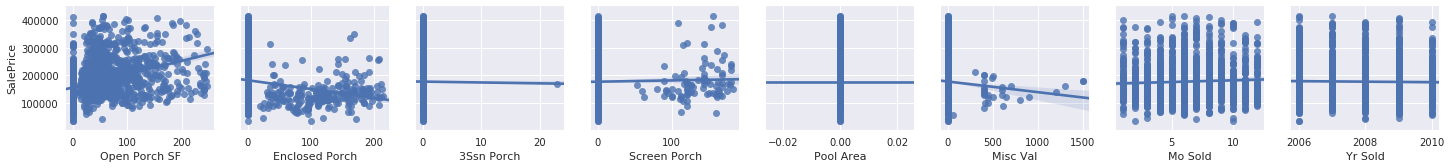

In [51]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[30:], kind="reg")

In [52]:
# Select feature columns that will be used on the regression analysis
X = df[['Lot Frontage','Lot Area','Overall Qual','Overall Cond',
        'Year Remod/Add','1st Flr SF','Gr Liv Area',
        'Garage Yr Blt', 'Garage Area']]

In [53]:
# Select our target/dependent variable
y = df['SalePrice']

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

## Simple Linear Regression
 Let's first perform a simple linear regression first, and to do so I selected Living Area (sqft) column, cause the pairplots above showed that it has a strong relation to the SalePrice.
 
 
Y= β0 + β1X1 + e

In [54]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model, using only one independent variable
simple_column = ['Gr Liv Area']
regr.fit(X_train[simple_column], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

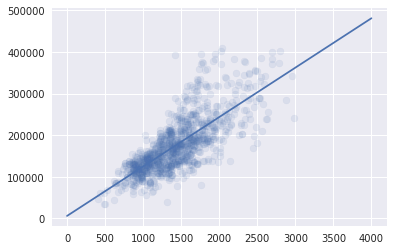

In [55]:
# plot training data points
plt.scatter(X_train['Gr Liv Area'],y_train,alpha=.1)
vec = np.linspace(0,4000,1000)
plt.plot(vec, regr.intercept_ + regr.coef_[0]*vec)

In [56]:
# get the predictions on the training set
# y_pred_train = regr.predict(X_train[simple_column])

#### The intercept
Predicted value for y if X == 0

As there is no data points that X == 0 in the dataset, the intercept is just part of the linear regression function

In [59]:
print('B0 or y-intercept:', regr.intercept_)

('B0 or y-intercept:', 6086.769047319802)


#### The coefficient



In [60]:
print('Coefficients: ', regr.coef_[0])

('Coefficients: ', 118.71187269535366)


#### Let's write our model

Y = intercept + coefficient * X + e


Y = 6086.76 + 118.71 * X + e

In [71]:
# make predictions using the testing set
y_pred_test = regr.predict(X_test[simple_column])

### Evaluating the model

**Mean Squared Error**

In [88]:
mse_simple_linreg = np.sqrt(mean_squared_error(y_pred_test, y_test))
print('We are on average USD', mse_simple_linreg, 'away from the real value of the house')

('We are on average USD', 47290.35442243334, 'away from the real value of the house')


**R2**

Measures proportion of variability in Y that is explained by X using our model

Explained variance score: 1 is perfect prediction

In [90]:
print('Variance score: %.2f' % r2_score(y_test, y_pred_test))

Variance score: 0.55


#### Visualizing results

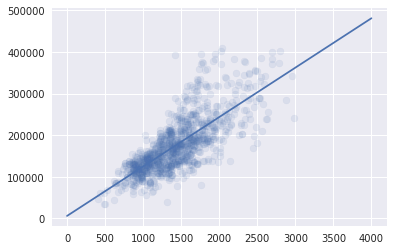

In [69]:
# plot training data points
plt.scatter(X_train['Gr Liv Area'],y_train,alpha=.1)
vec = np.linspace(0,4000,1000)
plt.plot(vec, regr.intercept_ + regr.coef_[0]*vec)

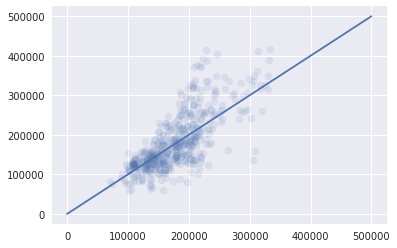

In [62]:
## Plot predicted vs actual 
plt.scatter(y_pred_test,y_test,alpha=.1)
plt.plot(np.linspace(0,500000,1000),np.linspace(0,500000,1000))

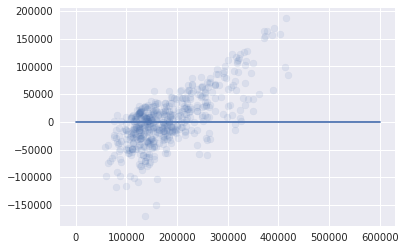

In [63]:
# Residual Plot
# Plot predicted vs actual 

plt.scatter(y_test, y_test-y_pred_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

## Multiple Linear Regression

Now we will use all the other features that we find a relation with SalePrice when analyzing the pairplots.

Y = β0 + β1X1 + β2X2 … + βnXn + e

In [91]:
# train the model
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print('B0 or y-intercept:', regr.intercept_)

('B0 or y-intercept:', -1044119.1649980755)


In [95]:
# print('Coefficients: ', regr.coef_[0])
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[idx]))

The coefficient for Lot Frontage is 176.138975203
The coefficient for Lot Area is 1.07342614368
The coefficient for Overall Qual is 19047.9327998
The coefficient for Overall Cond is 951.597412083
The coefficient for Year Remod/Add is 316.267964221
The coefficient for 1st Flr SF is 34.4163463499
The coefficient for Gr Liv Area is 46.8627166856
The coefficient for Garage Yr Blt is 163.367199026
The coefficient for Garage Area is 42.4424601889


#### Let's write our model

Y = β0 + β1X1 + β2X2 … + βnXn + e

Y = -1044119.16 + (176.13 * X1) + (1.07 * X2) … + (42.44 * X9) + e


### Evaluating the model

In [96]:
# make predictions using the testing set
y_pred_test = regr.predict(X_test)

In [97]:
mse_simple_linreg = np.sqrt(mean_squared_error(y_pred_test, y_test))
print('We are on average USD', mse_simple_linreg, 'away from the real value of the house')

('We are on average USD', 27381.326377233214, 'away from the real value of the house')


In [98]:
print('Variance score: %.2f' % r2_score(y_test, y_pred_test))

Variance score: 0.85


### Model Explanation
When we added the other features all model performed much better.

Let's analyze which features were the most important to our model.

In [102]:
# create a PermutationImportance object
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2795 ± 0.0403,Overall Qual
0.1555 ± 0.0094,Gr Liv Area
0.0518 ± 0.0117,1st Flr SF
0.0333 ± 0.0090,Garage Area
0.0176 ± 0.0062,Year Remod/Add
0.0071 ± 0.0036,Garage Yr Blt
0.0069 ± 0.0028,Lot Area
0.0056 ± 0.0023,Lot Frontage
0.0015 ± 0.0010,Overall Cond


Through this simple piece of code we can evaluate feature importance using Permutation Importance technique.

# Resources

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html